In [258]:
# Import libraries for neural network using numpy
import numpy as np

# Libraries for data manipulation
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
# Neural Network implementation using NumPy

class Neuron:
    def __init__(self, input_size, learning_rate=0.01):

        """Initialization of a single neuron with weights and bias."""

        # Initialize weights with He initialization for better convergence
        self.weights = np.random.randn(input_size) * np.sqrt(2.0 / input_size)
        self.bias = 0.0
        self.learning_rate = learning_rate

        # Placeholders for storing intermediate values
        self.input_size = input_size

    def sigmoid(self, x):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """Derivative of the sigmoid function."""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def tanh(self, x):
        """Tanh activation function."""
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        """Derivative of the tanh function."""
        return 1 - np.tanh(x) ** 2
    
    def relu(self, x):
        """ReLU activation function."""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivative of the ReLU function."""
        return np.where(x > 0, 1, 0)
    
    def leaky_relu(self, x, alpha=0.01):
        """Leaky ReLU activation function."""
        return np.where(x > 0, x, alpha * x)
    
    def leaky_relu_derivative(self, x, alpha=0.01):
        """Derivative of the Leaky ReLU function."""
        return np.where(x > 0, 1, alpha)
    
    # Forward Propagation
    def forward(self, X, activation='relu'):
        """Forward pass through the neuron."""

        # Linear Input
        self.input = X

        # Linear combination output
        self.linear_output = np.dot(self.input, self.weights) + self.bias

        # Activation
        if activation == 'sigmoid':
            self.activated_output = self.sigmoid(self.linear_output)
        elif activation == 'tanh':
            self.activated_output = self.tanh(self.linear_output)
        elif activation == 'relu':
            self.activated_output = self.relu(self.linear_output)
        elif activation == 'leaky_relu':
            self.activated_output = self.leaky_relu(self.linear_output)
        else:
            raise ValueError(f"Unsupported activation function {activation}")
        
        return self.activated_output

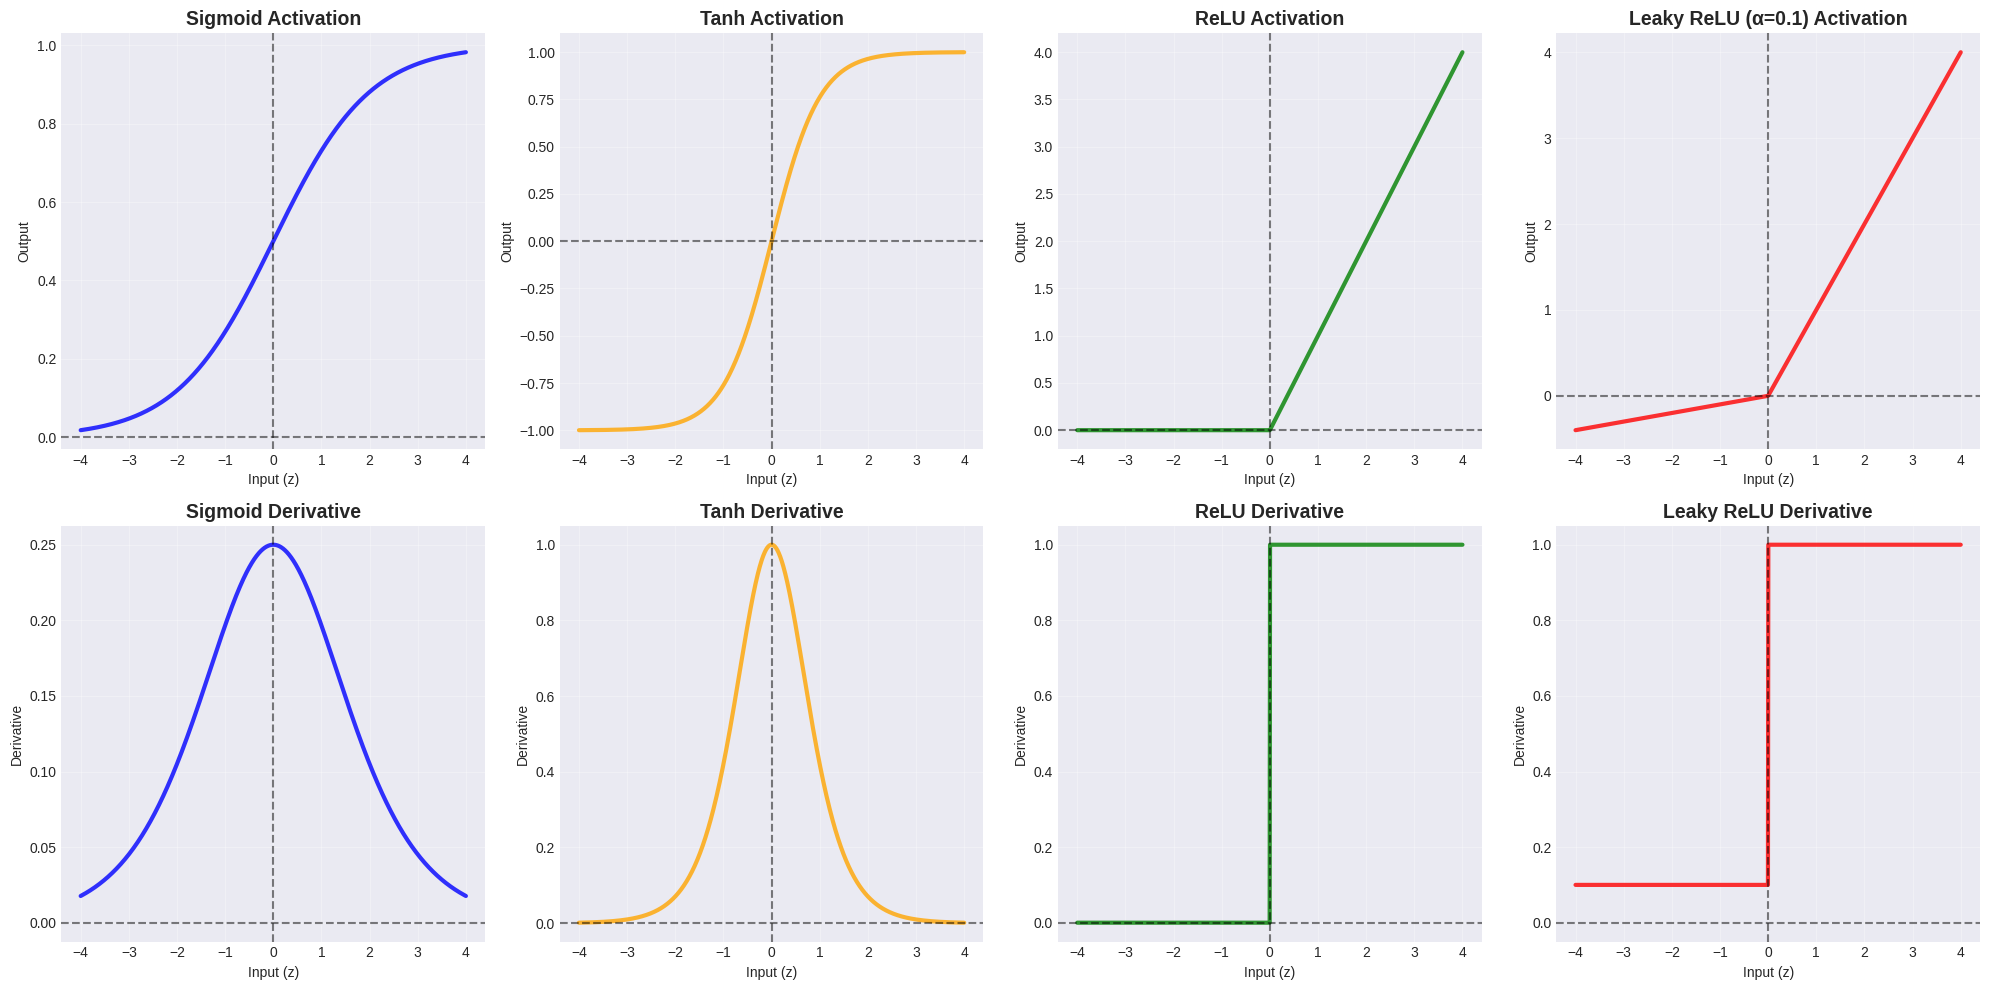

In [260]:
# Create a Neuron instance
neuron = Neuron(input_size=3, learning_rate=0.01)

# Create sample input data for plotting
x = np.linspace(-4, 4, 1000)

# Calculate activations and derivatives

alpha = 0.1  # Increased from default 0.01 for better visualization

sigmoid_out = neuron.sigmoid(x)
tanh_out = neuron.tanh(x)
relu_out = neuron.relu(x)
leaky_relu_out = neuron.leaky_relu(x, alpha=alpha)

sigmoid_deriv = neuron.sigmoid_derivative(x)
tanh_deriv = neuron.tanh_derivative(x)
relu_deriv = neuron.relu_derivative(x)
leaky_relu_deriv = neuron.leaky_relu_derivative(x, alpha=alpha)

# Set up professional plotting style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Colors for consistency
colors = ['blue', 'orange', 'green', 'red']
activation_names = ['Sigmoid', 'Tanh', 'ReLU', f'Leaky ReLU (α={alpha})']
activations = [sigmoid_out, tanh_out, relu_out, leaky_relu_out]
derivatives = [sigmoid_deriv, tanh_deriv, relu_deriv, leaky_relu_deriv]

# Plot activations (top row)
for i, (name, activation, color) in enumerate(zip(activation_names, activations, colors)):
    axes[0, i].plot(x, activation, color=color, linewidth=3, alpha=0.8)
    axes[0, i].set_title(f'{name} Activation', fontsize=14, fontweight='bold')
    axes[0, i].set_xlabel('Input (z)')
    axes[0, i].set_ylabel('Output')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[0, i].axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Plot derivatives (bottom row)
for i, (name, derivative, color) in enumerate(zip(activation_names, derivatives, colors)):
    axes[1, i].plot(x, derivative, color=color, linewidth=3, alpha=0.8)
    axes[1, i].set_title(f'{name.replace(f" (α={alpha})", "")} Derivative', fontsize=14, fontweight='bold')
    axes[1, i].set_xlabel('Input (z)')
    axes[1, i].set_ylabel('Derivative')
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    axes[1, i].axvline(x=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

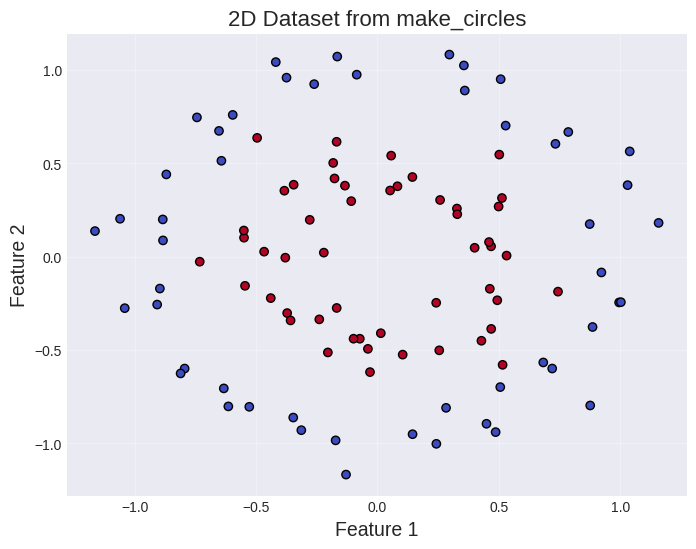

In [261]:
# 2-layer neural network implementation

from sklearn.datasets import make_circles

# Create 2D dataset with make_circles
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('2D Dataset from make_circles', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [262]:
# 2-layer neural network implementation

class TwoLayerNN:
    def __init__(self, input_size=2, hidden_size=4, output_size=1, learning_rate=0.01, random_state=42):
        """Initialize the neural network with random weights and biases."""
        
        # Set random seed for reproducibility
        np.random.seed(random_state)
        
        # Hidden layer weights and biases (He initialization)
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        
        # Output layer weights and biases
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        # Learning rate
        self.learning_rate = learning_rate
        
        # Store intermediate values for backpropagation
        self.Z1 = None
        self.A1 = None
        self.Z2 = None
        self.A2 = None
    
    def relu(self, Z):
        """ReLU activation function."""
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        """Derivative of ReLU."""
        return np.where(Z > 0, 1, 0)
    
    def sigmoid(self, Z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-Z))
    
    def forward(self, X):
        """Forward pass through the network."""
        
        # Hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        
        # Output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        
        return self.A2
    
    def compute_loss(self, y_true, y_pred):
        """Compute binary cross-entropy loss."""
        m = y_true.shape[0]
        loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
        return loss
    
    def backward(self, X, y_true, y_pred):
        """Backward pass to compute gradients and update parameters."""
        
        m = y_true.shape[0]
        
        # Output layer gradients
        dZ2 = y_pred - y_true.reshape(-1, 1)  # ∂L/∂Z2
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)  # ∂L/∂W2
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # ∂L/∂b2
        
        # Hidden layer gradients
        dA1 = np.dot(dZ2, self.W2.T)  # ∂L/∂A1
        dZ1 = dA1 * self.relu_derivative(self.Z1)  # ∂L/∂Z1
        dW1 = (1/m) * np.dot(X.T, dZ1)  # ∂L/∂W1
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # ∂L/∂b1
        
        # Update parameters
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def predict(self, X):
        """Make predictions (0 or 1) based on threshold 0.5."""
        probabilities = self.forward(X)
        return (probabilities > 0.5).astype(int).flatten()
    
    def predict_proba(self, X):
        """Return prediction probabilities."""
        return self.forward(X).flatten()
    
    def train(self, X, y, epochs=100):
        """Train the neural network."""
        loss_history = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)
            
            # Backward pass
            self.backward(X, y, y_pred)
            
            # Print progress every 100 epochs
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
        
        return loss_history

Epoch 100/1000, Loss: 0.7379
Epoch 200/1000, Loss: 0.7862
Epoch 300/1000, Loss: 0.8588
Epoch 400/1000, Loss: 0.9502
Epoch 500/1000, Loss: 1.0490
Epoch 600/1000, Loss: 1.1490
Epoch 700/1000, Loss: 1.2460
Epoch 800/1000, Loss: 1.3388
Epoch 900/1000, Loss: 1.4264
Epoch 1000/1000, Loss: 1.5094


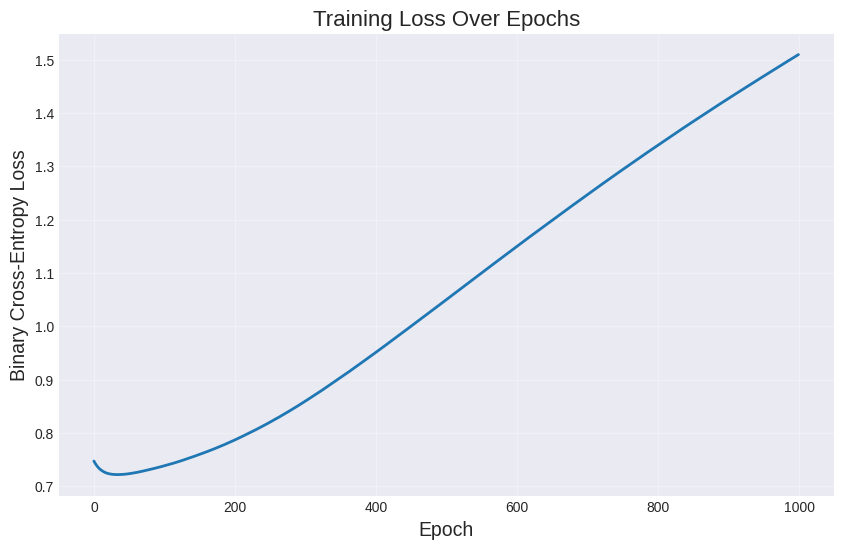

Training Accuracy: 98.00%


In [263]:
# Create and train the neural network

nn = TwoLayerNN(input_size=2, hidden_size=16, output_size=1, learning_rate=0.1, random_state=42)

loss_history = nn.train(X, y, epochs=1000)

# Plot training loss over epochs

plt.figure(figsize=(10, 6))
plt.plot(loss_history, linewidth=2)
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Binary Cross-Entropy Loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# Get predictions
predictions = nn.predict(X)

# Calculate accuracy
accuracy = np.mean(predictions == y) * 100

print(f"Training Accuracy: {accuracy:.2f}%")

Accuracy: 98.00%


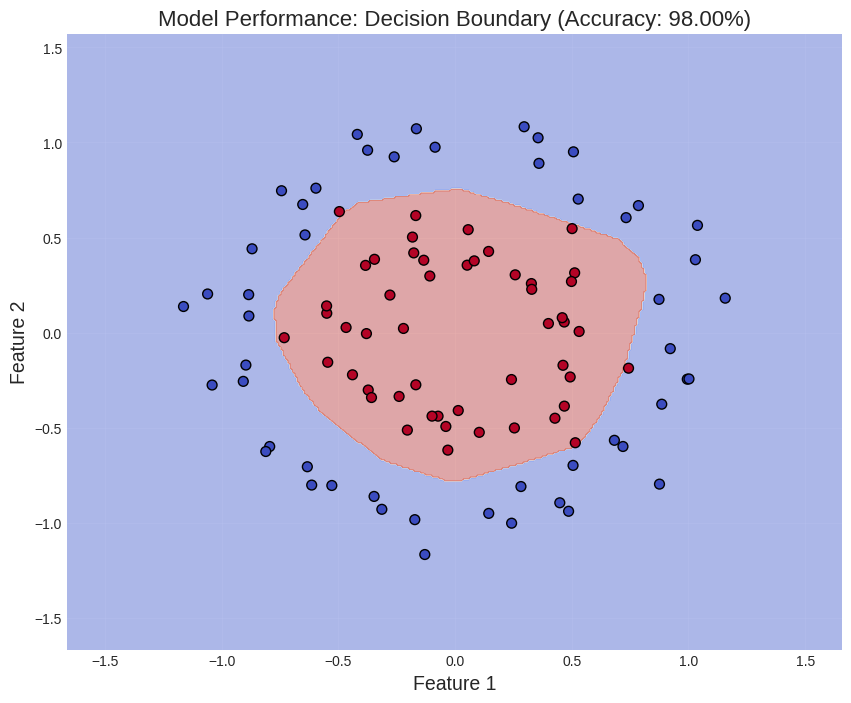

In [264]:
# Diagram 1: Model Performance (Accuracy + Decision Boundary)

predictions = nn.predict(X)
accuracy = np.mean(predictions == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Decision boundary plot

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title(f'Model Performance: Decision Boundary (Accuracy: {accuracy:.2f}%)', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

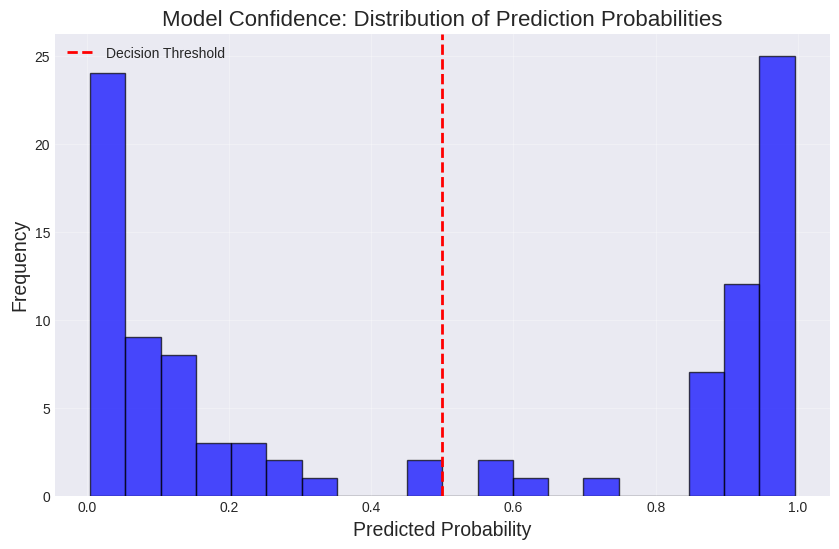

Confident Predictions (>0.8 or <0.2): 88.00%


In [265]:
# Diagram 2: Model Confidence (Prediction Probabilities Histogram)

probabilities = nn.predict_proba(X)

# Histogram of probabilities

plt.figure(figsize=(10, 6))
plt.hist(probabilities, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
plt.title('Model Confidence: Distribution of Prediction Probabilities', fontsize=16)
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Confidence metrics

confident_predictions = np.sum((probabilities > 0.8) | (probabilities < 0.2))
total_predictions = len(probabilities)
confidence_rate = confident_predictions / total_predictions * 100
print(f"Confident Predictions (>0.8 or <0.2): {confidence_rate:.2f}%")